In [23]:
import tensorflow as tf

In [24]:
w = tf.Variable(4.)
b = tf.Variable(1.)

@tf.function
def hypothesis(x):
    return w * x + b

x_test = [3.5, 5, 5.5, 6]

hypothesis(x_test)

2023-07-06 18:10:13.891154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([15., 21., 23., 25.], dtype=float32)>

In [25]:
def get_mse(y_pred, y_test):
    return tf.reduce_mean(tf.square(y_pred - y_test))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

optimizer = tf.optimizers.SGD(.01)

for i in range(301):
    with tf.GradientTape() as tape:
        y_pred = hypothesis(x)
        loss = get_mse(y_pred, y)
    gradients = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if i % 10 == 0:
        print(f"epoch: {i:3} | w_value: {w.numpy():.4f} | b_value: {b.numpy():.4f} | mse: {loss.numpy():.4f}")


2023-07-06 18:10:13.921070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-06 18:10:13.938662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


epoch:   0 | w_value: 8.2133 | b_value: 1.6644 | mse: 1402.5555
epoch:  10 | w_value: 10.4971 | b_value: 1.9769 | mse: 1.3512
epoch:  20 | w_value: 10.5047 | b_value: 1.9297 | mse: 1.3282
epoch:  30 | w_value: 10.5119 | b_value: 1.8844 | mse: 1.3070
epoch:  40 | w_value: 10.5188 | b_value: 1.8409 | mse: 1.2874
epoch:  50 | w_value: 10.5254 | b_value: 1.7991 | mse: 1.2695
epoch:  60 | w_value: 10.5318 | b_value: 1.7591 | mse: 1.2529
epoch:  70 | w_value: 10.5379 | b_value: 1.7206 | mse: 1.2376
epoch:  80 | w_value: 10.5438 | b_value: 1.6837 | mse: 1.2236
epoch:  90 | w_value: 10.5494 | b_value: 1.6483 | mse: 1.2107
epoch: 100 | w_value: 10.5548 | b_value: 1.6143 | mse: 1.1987
epoch: 110 | w_value: 10.5600 | b_value: 1.5817 | mse: 1.1878
epoch: 120 | w_value: 10.5650 | b_value: 1.5504 | mse: 1.1777
epoch: 130 | w_value: 10.5697 | b_value: 1.5204 | mse: 1.1684
epoch: 140 | w_value: 10.5743 | b_value: 1.4916 | mse: 1.1598
epoch: 150 | w_value: 10.5787 | b_value: 1.4639 | mse: 1.1519
epoch:

In [26]:
# Keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

model = Sequential()
model.add(Dense(1, input_dim=1, activation="linear"))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss="mse", metrics=["mse"])

model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 147ms/step - loss: 4161.8413 - mse: 4161.8413
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 513.1853 - mse: 513.1853
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 64.2443 - mse: 64.2443
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 9.0040 - mse: 9.0040
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 2.2058 - mse: 2.2058
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3679 - mse: 1.3679
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2634 - mse: 1.2634
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2492 - mse: 1.2492
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2461 - mse: 1.2461
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2444 - mse: 1.2444


2023-07-06 18:10:14.812433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2429 - mse: 1.2429
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2414 - mse: 1.2414
Epoch 13/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2399 - mse: 1.2399
Epoch 14/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2384 - mse: 1.2384
Epoch 15/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2369 - mse: 1.2369
Epoch 16/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2355 - mse: 1.2355
Epoch 17/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2340 - mse: 1.2340
Epoch 18/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2326 - mse: 1.2326
Epoch 19/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2312 - mse: 1.2312
Epoch 20/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2298 - mse: 1.2298
Epoch 21/300
1/1 [==============================] - 0s 5ms/step - loss

1/1 [==============================] - 0s 31ms/step


2023-07-06 18:10:19.268156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


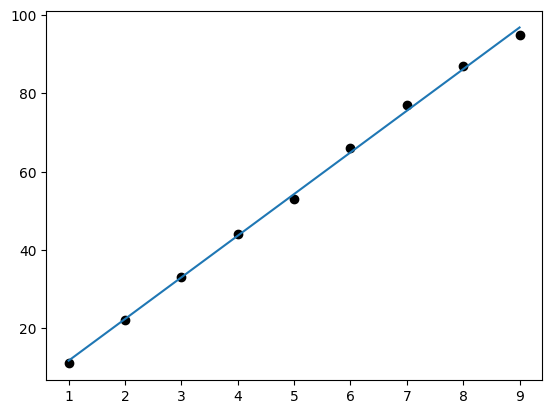

In [27]:
plt.plot(x, model.predict(x))
plt.scatter(x, y, c="black")
plt.show()

In [28]:
model.predict([9.5])

1/1 [==============================] - 0s 39ms/step


2023-07-06 18:10:19.413148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[102.15316]], dtype=float32)